https://algorithmicthoughts.wordpress.com/2013/07/26/machine-learning-mini-batch-k-means/

Even the smaller batch jobs that I submitted for testing takes more than 5 hours ! 

Accidentally cped the wrong py script so it was still doing the full dataset oops

In [4]:
print 170./60 ,"min"

2.83333333333 min


In [7]:
import time
start = time.time()
time.sleep(1)
end = time.time()
print end-start

1.00139093399


Ok so this is in seconds...

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
np.arange(50,1000,100)

array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950])

Okay scale test 4 is ones with the right hours 

Going to write a bash script to delete jobs since theres so many..

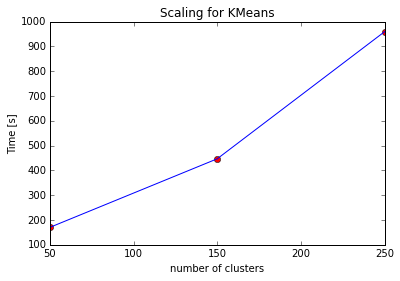

In [15]:
# For N= 10000
n_cluster = [50,150,250]
t = [170.252751112,446.780827045,959.439678907]
plt.plot(n_cluster,t,'o',color="red")
plt.plot(n_cluster,t,color="blue")
plt.xlabel("number of clusters")
plt.ylabel("Time [s]")
plt.title("Scaling for KMeans")

The down side to minibatch kmeans is that it does not have n_jobs as an arguement so you cam not run this in parallel 

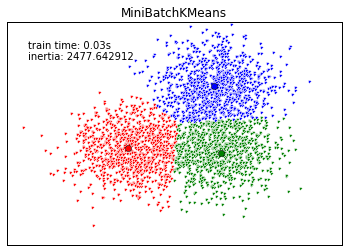

In [26]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)
fig = plt.figure()
colors = ['r','g','b']
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)
# MiniBatchKMeans
ax = fig.add_subplot(111)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

plt.show()